In [1]:
# I import useful modules
import pandas as pd
import scipy.stats
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
'''I read the data file. I then want to see what columns I have (this is proprietary data and 
I am not allowed to show it. Top 1K shows whether the startup is in the top 1,000 in the YN network.
Score is a normalized score given to a startup by the judge.'''
genderdata = pd.read_csv("alldata.csv")
genderdata.columns

Index([u'person_id', u'member_type', u'entry_id', u'Gender', u'Score',
       u'Top 1K', u'Industry', u'Degree completed', u'Country', u'Region',
       u'Continent', u'Product type'],
      dtype='object')

In [3]:
# Firstly, I want to see what is the proportion of females and males in the non-1K startups.

non1k = genderdata[genderdata['Top 1K'] == 'no']
# I now look at the gender counts for non-1K startups.
non1k['Gender'].value_counts(normalize=True)

Male      0.730867
Female    0.269133
Name: Gender, dtype: float64

In [13]:
# I can see that roughly 73% of the network is male and 27% of the network is female.

In [4]:
data1k = genderdata[genderdata['Top 1K'] == 'yes']
data1k['Gender'].value_counts(normalize=True)

Male      0.718926
Female    0.281074
Name: Gender, dtype: float64

In [ ]:
'''I can see above that the difference between males and females in the two 1,000 is very small.'''

In [7]:
# Score for females for all startups.
females = genderdata[genderdata['Gender'] == 'Female']
females['Score'].describe()

count    6182.000000
mean        0.508826
std         0.244995
min         0.000000
25%         0.348214
50%         0.483333
75%         0.700000
max         1.000000
Name: Score, dtype: float64

(array([ 278.,   16.,   14.,   19.,   24.,   33.,   51.,   15.,   53.,
          69.,   86.,   57.,  114.,  136.,  111.,  177.,  228.,  175.,
         319.,  278.,  273.,  240.,  180.,  124.,   76.,  263.,  139.,
          97.,  157.,  114.,  135.,  178.,  108.,  132.,  139.,  150.,
         150.,  168.,  101.,   98.,  162.,  100.,   90.,  115.,   54.,
          88.,   78.,   30.,   21.,  169.]),
 array([ 0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,
         0.18,  0.2 ,  0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,  0.34,
         0.36,  0.38,  0.4 ,  0.42,  0.44,  0.46,  0.48,  0.5 ,  0.52,
         0.54,  0.56,  0.58,  0.6 ,  0.62,  0.64,  0.66,  0.68,  0.7 ,
         0.72,  0.74,  0.76,  0.78,  0.8 ,  0.82,  0.84,  0.86,  0.88,
         0.9 ,  0.92,  0.94,  0.96,  0.98,  1.  ]),
 <a list of 50 Patch objects>)

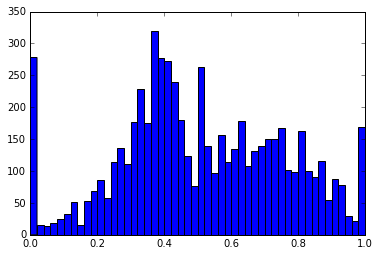

In [8]:
plt.hist(females['Score'], bins=50)

In [9]:
# I now want to look at all the males.
males = genderdata[genderdata['Gender'] == 'Male']
males['Score'].describe()

count    16717.000000
mean         0.516949
std          0.242252
min          0.000000
25%          0.352113
50%          0.519608
75%          0.696000
max          1.000000
Name: Score, dtype: float64

(array([ 655.,   43.,   57.,   90.,   91.,  117.,  153.,  103.,  157.,
         200.,  259.,  165.,  297.,  322.,  315.,  437.,  466.,  408.,
         676.,  449.,  583.,  517.,  425.,  376.,  300.,  698.,  540.,
         310.,  540.,  391.,  527.,  639.,  358.,  438.,  468.,  442.,
         440.,  389.,  324.,  219.,  474.,  241.,  231.,  287.,  153.,
         175.,  217.,  115.,   67.,  373.]),
 array([ 0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,
         0.18,  0.2 ,  0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,  0.34,
         0.36,  0.38,  0.4 ,  0.42,  0.44,  0.46,  0.48,  0.5 ,  0.52,
         0.54,  0.56,  0.58,  0.6 ,  0.62,  0.64,  0.66,  0.68,  0.7 ,
         0.72,  0.74,  0.76,  0.78,  0.8 ,  0.82,  0.84,  0.86,  0.88,
         0.9 ,  0.92,  0.94,  0.96,  0.98,  1.  ]),
 <a list of 50 Patch objects>)

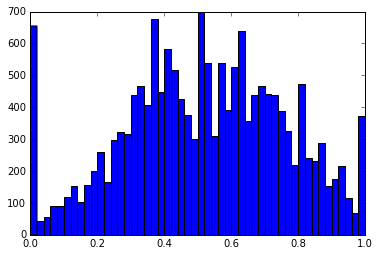

In [10]:
plt.hist(males['Score'], bins=50)

In [17]:
# I want to perform an ANOVA to see if there is a difference in the mean of the two samples (male and female)

scipy.stats.f_oneway(males['Score'], females['Score'])

'''I can see that the p-value is really small - <0.05 which makes this test statistically significant.
The F-value is 5.04 which means ??'''

F_onewayResult(statistic=5.043663289473618, pvalue=0.024725666922025581)

In [19]:
scipy.stats.ttest_ind(males['Score'], females['Score'])

# Again, there is a significant difference in the scores betwen males and females.

Ttest_indResult(statistic=2.2458101632759337, pvalue=0.024725666922142224)

In [11]:
# I now want to look at scores for top 1,000 startups on an individual level - for different genders.
fem1k = data1k[data1k['Gender'] == 'Female']
fem1k['Score'].describe()

count    450.000000
mean       0.948485
std        0.044166
min        0.875000
25%        0.906667
50%        0.937500
75%        1.000000
max        1.000000
Name: Score, dtype: float64

In [12]:
'''I now want to investigate if all-female, all-male or mixed-gender startups do best in startup competitions.
I read another file with data on startups, not individual entrepreneurs.'''

startupgender = pd.read_csv("startupgender.csv")
startupgender.columns
'''Unique_entry_id refers to the unique entry_id of a startup. Females column refers to the number of females,
males column refers to the number of males in the startup.'''

'Unique_entry_id refers to the unique entry_id of a startup. Females column refers to the number of females,\nmales column refers to the number of males in the startup.'

In [13]:
# I add two extra columns that will tell me the percentage of females and males in each startup.
startupgender['% of females'] = startupgender['Females'] / (startupgender['Females'] + startupgender['Males'])
startupgender['% of males'] = startupgender['Males'] / (startupgender['Females'] + startupgender['Males'])

In [14]:
# Firstly, I want to look at all-female startups, i.e. startups where % of males is equal to zero.
femalestartups = startupgender[startupgender['% of males'] == 0]
femalestartups['Score'].describe()

count    3648.000000
mean        0.471768
std         0.249211
min         0.000000
25%         0.325893
50%         0.413793
75%         0.661616
max         1.000000
Name: Score, dtype: float64

In [15]:
# Secondly, I look at all-male startups, i.e. startups where % of females is equal to zero.
malestartups = startupgender[startupgender['% of females'] == 0]
malestartups['Score'].describe()

count    10073.000000
mean         0.485887
std          0.249305
min          0.000000
25%          0.323661
50%          0.466667
75%          0.668675
max          1.000000
Name: Score, dtype: float64

In [16]:
# I now want to look at mixed-gender startups - so the % of females and % of males cannot be zero.
mixedgender = startupgender[startupgender['% of females'] != 0]
mixedgender = mixedgender[mixedgender['% of males'] != 0]
mixedgender['Score'].describe()

count    1625.000000
mean        0.554996
std         0.224366
min         0.000000
25%         0.412437
50%         0.562500
75%         0.730964
max         1.000000
Name: Score, dtype: float64

In [22]:
scipy.stats.ttest_ind(malestartups['Score'], femalestartups['Score'])

Ttest_indResult(statistic=2.9309352875201866, pvalue=0.0033850062156725088)

In [23]:
scipy.stats.ttest_ind(mixedgender['Score'], femalestartups['Score'])

Ttest_indResult(statistic=11.539429828596528, pvalue=1.9326731527045705e-30)

In [24]:
scipy.stats.ttest_ind(mixedgender['Score'], malestartups['Score'])

Ttest_indResult(statistic=10.509053538629274, pvalue=1.0216271247913074e-25)

In [21]:
scipy.stats.f_oneway(mixedgender['Score'], malestartups['Score'], femalestartups['Score'])
# This essentially means that these three groups do differently in a startup competition.

F_onewayResult(statistic=67.722192878127856, pvalue=5.2201705180889969e-30)

In [25]:
# I now want to see what two groups differ.

from statsmodels.stats.multicomp import pairwise_tukeyhsd
print pairwise_tukeyhsd(mixedgender['Score'], malestartups['Score'], femalestartups['Score'])

ValueError: data has 1625 elements and groups has 10073

In [51]:
x = mixedgender['Score']
chi2, p = scipy.stats.chisquare(x)
msg = "Test Statistic: {}\np-value: {}"
print (msg.format(chi2, p))

Test Statistic: 147.302889266
p-value: 1.0
